In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.0'

In [3]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Sequential,Model
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
img_size=[224,224]

In [5]:
train_path='Datasets/Train'
test_path='Datasets/Test'

In [6]:
resnet=ResNet50(weights='imagenet',input_shape=img_size+[3],include_top=False)

In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
for layer in resnet.layers:
    layer.trainable=False

In [9]:
folders=glob('Datasets/Train/*')

In [10]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [11]:
x=Flatten()(resnet.output)

In [12]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten')>

In [13]:
pred=Dense(len(folders),activation='softmax')(x)

In [14]:
model=Model(inputs=resnet.input,outputs=pred)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [18]:
training_set=train_datagen.flow_from_directory('Datasets/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [19]:
test_set=train_datagen.flow_from_directory('Datasets/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 58 images belonging to 3 classes.


In [20]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=30,steps_per_epoch=len(training_set),validation_steps=len(test_set))

C:\Users\ganes\che\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
2/2 [==============================] - 17s 10s/step - loss: 3.2435 - accuracy: 0.3750 - val_loss: 10.6621 - val_accuracy: 0.3276
Epoch 2/30
2/2 [==============================] - 10s 7s/step - loss: 11.9341 - accuracy: 0.3646 - val_loss: 4.9021 - val_accuracy: 0.5172
Epoch 3/30
2/2 [==============================] - 10s 7s/step - loss: 5.8952 - accuracy: 0.2917 - val_loss: 9.9644 - val_accuracy: 0.1552
Epoch 4/30
2/2 [==============================] - 10s 7s/step - loss: 8.1564 - accuracy: 0.3542 - val_loss: 9.9352 - val_accuracy: 0.1552
Epoch 5/30
2/2 [==============================] - 11s 8s/step - loss: 4.8836 - accuracy: 0.3958 - val_loss: 5.4973 - val_accuracy: 0.3276
Epoch 6/30
2/2 [==============================] - 11s 8s/step - loss: 5.1211 - accuracy: 0.3854 - val_loss: 2.9007 - val_accuracy: 0.4483
Epoch 7/30
2/2 [==============================] - 12s 9s/step - loss: 5.0626 - accuracy: 0.4688 - val_loss: 5.3407 - val_accuracy: 0.5172
Epoch 8/30
2/2 [===============

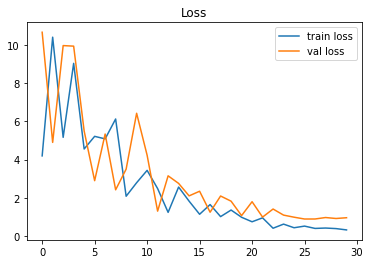

In [21]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.title("Loss")
plt.show()

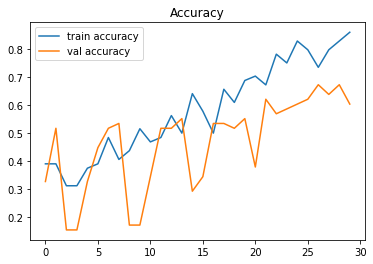

In [22]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

In [23]:
from tensorflow.keras.models import load_model

In [24]:
model.save('model_resnet50.h5')

In [25]:
y_pred=model.predict(test_set)

In [26]:
y_pred

array([[2.89114356e-01, 8.38964581e-02, 6.26989186e-01],
       [7.95290321e-02, 4.13114250e-01, 5.07356703e-01],
       [7.87945315e-02, 1.68483540e-01, 7.52721846e-01],
       [3.98484021e-01, 1.87497050e-01, 4.14018929e-01],
       [1.87581748e-01, 6.16640270e-01, 1.95777997e-01],
       [9.87073034e-02, 7.39020705e-01, 1.62271962e-01],
       [2.75705606e-01, 1.24657787e-02, 7.11828589e-01],
       [4.86719877e-01, 1.29862726e-02, 5.00293851e-01],
       [6.12829328e-02, 2.70527857e-03, 9.36011791e-01],
       [9.17585492e-01, 4.50473167e-02, 3.73671614e-02],
       [1.29596755e-01, 7.61808813e-01, 1.08594455e-01],
       [6.64413869e-01, 1.57635601e-04, 3.35428476e-01],
       [1.78764910e-01, 6.27854586e-01, 1.93380564e-01],
       [5.68406507e-02, 2.76579708e-01, 6.66579604e-01],
       [9.00166109e-02, 2.73815269e-04, 9.09709632e-01],
       [1.91387400e-01, 4.23209876e-01, 3.85402769e-01],
       [1.35486305e-01, 4.88833338e-02, 8.15630317e-01],
       [1.84258252e-01, 6.00052

In [27]:
import numpy as np

In [28]:
y_pred=np.argmax(y_pred,1)

In [29]:
y_pred

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2,
       1, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2], dtype=int64)

In [95]:
img=image.load_img("Datasets/Train/audi/1.jpg",target_size=(224,224))

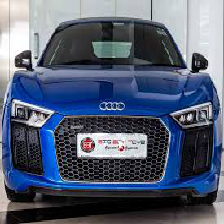

In [96]:
img

In [97]:
x=image.img_to_array(img)
x

array([[[233., 219., 208.],
        [234., 220., 209.],
        [237., 223., 212.],
        ...,
        [213., 216., 221.],
        [218., 221., 226.],
        [161., 164., 169.]],

       [[240., 226., 215.],
        [240., 226., 215.],
        [243., 229., 218.],
        ...,
        [213., 216., 221.],
        [217., 220., 225.],
        [161., 164., 169.]],

       [[247., 233., 222.],
        [247., 233., 222.],
        [250., 236., 225.],
        ...,
        [213., 216., 221.],
        [217., 220., 225.],
        [161., 164., 169.]],

       ...,

       [[130., 112., 108.],
        [135., 117., 113.],
        [138., 124., 123.],
        ...,
        [213., 212., 208.],
        [215., 210., 207.],
        [215., 210., 207.]],

       [[126., 108., 104.],
        [133., 115., 111.],
        [130., 116., 115.],
        ...,
        [217., 216., 212.],
        [218., 213., 210.],
        [218., 213., 210.]],

       [[121., 103.,  99.],
        [133., 115., 111.],
        [135., 1

In [98]:
x.shape

(224, 224, 3)

In [99]:
x/255

array([[[0.9137255 , 0.85882354, 0.8156863 ],
        [0.91764706, 0.8627451 , 0.81960785],
        [0.92941177, 0.8745098 , 0.83137256],
        ...,
        [0.8352941 , 0.84705883, 0.8666667 ],
        [0.85490197, 0.8666667 , 0.8862745 ],
        [0.6313726 , 0.6431373 , 0.6627451 ]],

       [[0.9411765 , 0.8862745 , 0.84313726],
        [0.9411765 , 0.8862745 , 0.84313726],
        [0.9529412 , 0.8980392 , 0.85490197],
        ...,
        [0.8352941 , 0.84705883, 0.8666667 ],
        [0.8509804 , 0.8627451 , 0.88235295],
        [0.6313726 , 0.6431373 , 0.6627451 ]],

       [[0.96862745, 0.9137255 , 0.87058824],
        [0.96862745, 0.9137255 , 0.87058824],
        [0.98039216, 0.9254902 , 0.88235295],
        ...,
        [0.8352941 , 0.84705883, 0.8666667 ],
        [0.8509804 , 0.8627451 , 0.88235295],
        [0.6313726 , 0.6431373 , 0.6627451 ]],

       ...,

       [[0.50980395, 0.4392157 , 0.42352942],
        [0.5294118 , 0.45882353, 0.44313726],
        [0.5411765 , 0

In [100]:
x=np.expand_dims(x,axis=0)

In [101]:
x

array([[[[233., 219., 208.],
         [234., 220., 209.],
         [237., 223., 212.],
         ...,
         [213., 216., 221.],
         [218., 221., 226.],
         [161., 164., 169.]],

        [[240., 226., 215.],
         [240., 226., 215.],
         [243., 229., 218.],
         ...,
         [213., 216., 221.],
         [217., 220., 225.],
         [161., 164., 169.]],

        [[247., 233., 222.],
         [247., 233., 222.],
         [250., 236., 225.],
         ...,
         [213., 216., 221.],
         [217., 220., 225.],
         [161., 164., 169.]],

        ...,

        [[130., 112., 108.],
         [135., 117., 113.],
         [138., 124., 123.],
         ...,
         [213., 212., 208.],
         [215., 210., 207.],
         [215., 210., 207.]],

        [[126., 108., 104.],
         [133., 115., 111.],
         [130., 116., 115.],
         ...,
         [217., 216., 212.],
         [218., 213., 210.],
         [218., 213., 210.]],

        [[121., 103.,  99.],
       

In [102]:
img_data=preprocess_input(x)
img_data

array([[[[ 1.0406100e+02,  1.0222100e+02,  1.0932000e+02],
         [ 1.0506100e+02,  1.0322100e+02,  1.1032000e+02],
         [ 1.0806100e+02,  1.0622100e+02,  1.1332000e+02],
         ...,
         [ 1.1706100e+02,  9.9221001e+01,  8.9320000e+01],
         [ 1.2206100e+02,  1.0422100e+02,  9.4320000e+01],
         [ 6.5060997e+01,  4.7221001e+01,  3.7320000e+01]],

        [[ 1.1106100e+02,  1.0922100e+02,  1.1632000e+02],
         [ 1.1106100e+02,  1.0922100e+02,  1.1632000e+02],
         [ 1.1406100e+02,  1.1222100e+02,  1.1932000e+02],
         ...,
         [ 1.1706100e+02,  9.9221001e+01,  8.9320000e+01],
         [ 1.2106100e+02,  1.0322100e+02,  9.3320000e+01],
         [ 6.5060997e+01,  4.7221001e+01,  3.7320000e+01]],

        [[ 1.1806100e+02,  1.1622100e+02,  1.2332000e+02],
         [ 1.1806100e+02,  1.1622100e+02,  1.2332000e+02],
         [ 1.2106100e+02,  1.1922100e+02,  1.2632000e+02],
         ...,
         [ 1.1706100e+02,  9.9221001e+01,  8.9320000e+01],
         [

In [103]:
model.predict(img_data)

array([[1.9064660e-07, 6.3486739e-14, 9.9999976e-01]], dtype=float32)

In [104]:
c=model.predict(img_data)

In [105]:
a=np.argmax(c,axis=1)

In [106]:
a

array([2], dtype=int64)

In [64]:
if a==0:
    print("The predicted car is Audi")
elif a==1:
    print("The predicted car is Lamborghini")
else:
    print("The predicted car is Mercedes")

The predicted car is Mercedes
